### Data Preperation

#### Importing liabraries

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot
from numpy import where
from sklearn import metrics
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#### Functions used to save the classification reports  and also charts of different models

In [2]:
def classification_report_csv(report,file):
    df = pd.DataFrame(report).transpose()
    filename = f'../../Output_Metrics/Modelling/{file}.csv'
    df.to_csv(filename, index=True)
    print(pd.read_csv(filename, index_col=0))

def chart_png(plt,file):
    filename = f'../../Output_Charts/Modelling/{file}.png'
    plt.savefig(filename, dpi=300)

#### Importing clean data

In [3]:
market_data= pd.read_csv("../../Input_Data/Modelling/clean_market_data.csv")
print("Market_data - Columns")
print(market_data.columns)
print("Market_data - Row counts")
print(market_data.Response.value_counts())

Market_data - Columns
Index(['ID', 'Age', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Customer_duration_days'],
      dtype='object')
Market_data - Row counts
0    1903
1     334
Name: Response, dtype: int64


#### Splitting the data to train and test

In [4]:
market_data_X= market_data.drop(labels=["ID","Country","Response"],axis=1)
market_data_Y=market_data["Response"]
print("Market Data X")
display(market_data_X)
print("Market Data Y")
print(market_data_Y)

Market Data X


,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Customer_duration_days
0,44,3,2,84835.0,0,0,0,189,104,379,...,4,6,1,0,0,0,0,0,0,3181
1,53,3,1,57091.0,0,0,0,464,5,64,...,3,7,5,0,0,0,0,1,0,3182
2,56,3,4,67267.0,0,1,0,134,11,59,...,2,5,2,0,0,0,0,0,0,3215
3,47,3,4,32474.0,1,1,0,10,0,1,...,0,2,7,0,0,0,0,0,0,3217
4,25,3,1,21474.0,1,0,0,6,16,24,...,1,2,7,1,0,0,0,0,0,3250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,40,3,4,51381.5,0,0,87,445,37,359,...,4,8,1,0,0,0,0,0,0,3386
2233,54,3,4,51381.5,1,1,87,19,4,12,...,0,3,5,0,0,0,0,0,0,3832
2234,58,3,1,51381.5,0,1,95,264,0,21,...,1,5,7,0,0,0,0,0,0,3422
2235,63,3,1,51381.5,2,1,96,48,5,48,...,1,4,6,0,0,0,0,0,0,3347


Market Data Y
0       1
1       1
2       0
3       0
4       1
       ..
2232    0
2233    0
2234    0
2235    0
2236    0
Name: Response, Length: 2237, dtype: int64


In [5]:
#Training and Test Data splitting
X_train,X_test,y_train,y_test = train_test_split(market_data_X,market_data_Y,test_size=0.2,random_state=0)

print(f'X train shape: {X_train.shape}')
print(f'Y train shape: {y_train.shape}')
print(f"No of customers accepted the offer in the last campaign i.e 1's {y_train.value_counts()[1]} in training data")
print(f"No of customers did not accept the offer in the last campaign i.e 0's {y_train.value_counts()[0]} in training data")

print(f'X test shape: {X_test.shape}')
print(f'Y test shape: {y_test.shape}')
print(f"No of customers accepted the offer in the last campaign i.e 1's {y_test.value_counts()[1]} in test data")
print(f"No of customers did not accept the offer in the last campaign i.e 0's {y_test.value_counts()[0]} in test data")

X train shape: (1789, 25)
Y train shape: (1789,)
No of customers accepted the offer in the last campaign i.e 1's 273 in training data
No of customers did not accept the offer in the last campaign i.e 0's 1516 in training data
X test shape: (448, 25)
Y test shape: (448,)
No of customers accepted the offer in the last campaign i.e 1's 61 in test data
No of customers did not accept the offer in the last campaign i.e 0's 387 in test data


#### Applying decision tree algorithm 

In [6]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 24,random_state=42)
clf.fit(X_train,y_train)
y_predict= clf.predict(X_test)
result_metrics = classification_report(y_test, y_predict, output_dict=True)
classification_report_csv(result_metrics,"DecisionTree_Pilot_version_Report")

              precision    recall  f1-score     support
0              0.922078  0.917313  0.919689  387.000000
1              0.492063  0.508197  0.500000   61.000000
accuracy       0.861607  0.861607  0.861607    0.861607
macro avg      0.707071  0.712755  0.709845  448.000000
weighted avg   0.863527  0.861607  0.862544  448.000000


Score:0.8616071428571429


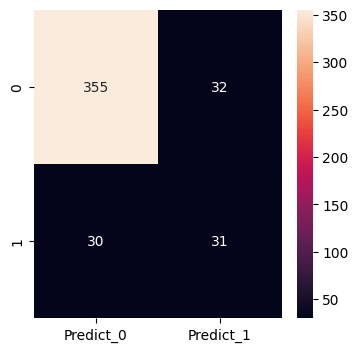

In [7]:
print(f"Score:{clf.score(X_test, y_test)}")
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0,1])
df_cm = pd.DataFrame(cm, index=[0, 1], columns=["Predict_0", "Predict_1"])
plt.figure(figsize = (4,4))
sns.heatmap(df_cm, annot=True ,fmt='g')

plt.show()

#### In the training data there are total of 1789 in which 1516 are 0's and 273 are 1's 
#### In testing data we have total of 448 records in which 387 are 0's and 61 are 1's
#### Using the decision tree model 355 records in test data are predicted as 0's correctly and 31 are predicted as 1's correctly with an accuracy score of 86%
#### However this model wouldn't perform well on unknown data in the future as the data used for modelling is imbalanced, precision and recall for the customers who accepted the offer is very less i.e just 13 % of the whole data for the positive predictions

### Using different sampling techniques to check which sampled data works well on test data

#### Using Random Over Sampler

In [8]:
ros = RandomOverSampler(random_state=30)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print("Counter after Random Over Sampler",Counter(y_resampled).items())
print("Y Train:\n",y_train.value_counts())
print("Y Resampled:\n",y_resampled.value_counts())
print(f"Shape after resampling X_train:{X_resampled.shape}")
print(f"Shape after resampling y_train:{y_resampled.shape}")
print(f"No of customers accepted the offer in the last campaign i.e 1's {y_resampled.value_counts()[1]} in resampled train data")
print(f"No of customers did not accept the offer in the last campaign i.e 0's {y_resampled.value_counts()[0]} in resampled train data")

Counter after Random Over Sampler dict_items([(0, 1516), (1, 1516)])
Y Train:
 0    1516
1     273
Name: Response, dtype: int64
Y Resampled:
 0    1516
1    1516
Name: Response, dtype: int64
Shape after resampling X_train:(3032, 25)
Shape after resampling y_train:(3032,)
No of customers accepted the offer in the last campaign i.e 1's 1516 in resampled train data
No of customers did not accept the offer in the last campaign i.e 0's 1516 in resampled train data


In [9]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 24,random_state=42)
clf.fit(X_resampled,y_resampled)
y_predict= clf.predict(X_test)
result_metrics = classification_report(y_test, y_predict, output_dict=True)
classification_report_csv(result_metrics,"Decision_Tree_Random_Over_Sampler_Report")

              precision    recall  f1-score     support
0              0.931759  0.917313  0.924479  387.000000
1              0.522388  0.573770  0.546875   61.000000
accuracy       0.870536  0.870536  0.870536    0.870536
macro avg      0.727073  0.745542  0.735677  448.000000
weighted avg   0.876018  0.870536  0.873064  448.000000


#### Precision and Recall for Class 1 is very low, just around 50%
#### There is an oversampling issue still, even after using RandomOverSampler
#### Will try using SMOTE for manipulating tuples for sample (Synthetic Minority Oversampling Technique)

In [10]:
counter = Counter(y_train)
print("Counter before Smote:-\t",counter)
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)
counter = Counter(y)
print("Counter after Smote:-\t",counter)
print("Counter items :-\t", counter.items())
print("Counter keys :-\t\t", counter.keys())

Counter before Smote:-	 Counter({0: 1516, 1: 273})
Counter after Smote:-	 Counter({0: 1516, 1: 1516})
Counter items :-	 dict_items([(0, 1516), (1, 1516)])
Counter keys :-		 dict_keys([0, 1])


In [11]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 24,random_state=42)
clf.fit(X,y)
y_predict= clf.predict(X_test)
result_metrics = classification_report(y_test, y_predict)
print("Result Matrix of Decision Tree after using SMOTE")
print(result_metrics)

Result Matrix of Decision Tree after using SMOTE
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       387
           1       0.38      0.46      0.42        61

    accuracy                           0.83       448
   macro avg       0.65      0.67      0.66       448
weighted avg       0.84      0.83      0.83       448



#### Using SMOTE to oversample the minority class and then use Random under sampler to undersample the majority class 

In [12]:
counter = Counter(y_train)
print("Counter before Smote and Random Under Sampler:-\n",counter)
over = SMOTE(sampling_strategy = "minority")
under = RandomUnderSampler(sampling_strategy = "not minority")
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y)
print("Counter after Smote and Random Under Sampler:-\n",counter)
print("X Shape",X.shape)

Counter before Smote and Random Under Sampler:-
 Counter({0: 1516, 1: 273})
Counter after Smote and Random Under Sampler:-
 Counter({0: 1516, 1: 1516})
X Shape (3032, 25)


In [13]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 24,random_state=42)
clf.fit(X,y)
y_predict= clf.predict(X_test)
result_metrics = classification_report(y_test, y_predict, output_dict=True)
print("Result Matrix of Decision Tree after using SMOTE and Random Under Sampler")
classification_report_csv(result_metrics,"DecisionTree_SMOTE_and_RandomUnderSampler_Report")

Result Matrix of Decision Tree after using SMOTE and Random Under Sampler
              precision    recall  f1-score     support
0              0.920110  0.863049  0.890667  387.000000
1              0.376471  0.524590  0.438356   61.000000
accuracy       0.816964  0.816964  0.816964    0.816964
macro avg      0.648290  0.693820  0.664511  448.000000
weighted avg   0.846088  0.816964  0.829080  448.000000


In [14]:
clf_CVV = DecisionTreeClassifier(criterion='entropy', max_depth = 20,random_state=42)
kvalues =[3,5,7,10]

for k in kvalues:
    kff = KFold(n_splits=k, random_state=None, shuffle=True) # Define the split - into 2 folds 
    kff.get_n_splits(X)
    print("KFold begins for K value:", k)

    for train_index, valid_index in kff.split(X,y):

        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        clf_CVV.fit(X_train, y_train)
        y_pred_valid =clf_CVV.predict(X_valid)
        y_pred_train=clf_CVV.predict(X_train)

        result_metrics_valid = classification_report(y_valid, y_pred_valid, output_dict=True)
        result_metrics_train = classification_report(y_train, y_pred_train, output_dict=True)

        print("==> Result Matrix after using KFolds on KFold Training Data with K value", k)
        classification_report_csv(
            result_metrics_train,
            f"KFold-DecisionTree Classifier -Training Data with k - {str(k)}",
        )
        print("\n")
        print("==> Result Matrix after using KFolds on KFold Validation Data with K value", k)
        classification_report_csv(
            result_metrics_valid,
            f"KFold-DecisionTree Classifier -validation Data with k - {str(k)}",
        )
        print("\n")

KFold begins for K value: 3
==> Result Matrix after using KFolds on KFold Training Data with K value 3
              precision    recall  f1-score      support
0              0.992149  1.000000  0.996059  1011.000000
1              1.000000  0.992079  0.996024  1010.000000
accuracy       0.996042  0.996042  0.996042     0.996042
macro avg      0.996075  0.996040  0.996041  2021.000000
weighted avg   0.996073  0.996042  0.996041  2021.000000


==> Result Matrix after using KFolds on KFold Validation Data with K value 3
              precision    recall  f1-score      support
0              0.837573  0.847525  0.842520   505.000000
1              0.846000  0.835968  0.840954   506.000000
accuracy       0.841741  0.841741  0.841741     0.841741
macro avg      0.841787  0.841747  0.841737  1011.000000
weighted avg   0.841791  0.841741  0.841736  1011.000000


==> Result Matrix after using KFolds on KFold Training Data with K value 3
              precision    recall  f1-score      support


#### Building learning curve to understand how the model performs on trainning and validation data

In [15]:
train_sizes = np.linspace(0.01,1.0,10)  # 5 times 5*3 = 15
train_sizes, train_accuracy, test_accuracy = learning_curve(clf_CVV, X, y, train_sizes = train_sizes, scoring = 'accuracy', cv=10, shuffle=True)
print("Training Sizes \n", train_sizes)
print("\n")
print("Training Accuracy \n", train_accuracy)
print("\n")
print("Testing Accuracy \n",test_accuracy)

Training Sizes 
 [  27  327  627  927 1227 1527 1827 2127 2427 2728]


Training Accuracy 
 [[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         0.9969419  0.9969419  0.9969419  1.
  1.         1.         1.         1.        ]
 [0.99681021 0.9984051  0.99681021 0.99681021 0.9984051  0.9984051
  0.99681021 1.         1.         0.9984051 ]
 [0.99676375 0.99892125 0.99676375 0.9978425  0.9978425  0.99892125
  0.9978425  1.         0.99892125 0.99568501]
 [0.99755501 0.99837001 0.99674002 0.99837001 0.99755501 0.99755501
  0.99674002 1.         0.99674002 0.99674002]
 [0.99672561 0.99803536 0.99672561 0.99672561 0.99803536 0.99738048
  0.99672561 0.99869024 0.99607073 0.99738048]
 [0.99616858 0.99726327 0.99616858 0.99671593 0.99726327 0.99781062
  0.99616858 0.99781062 0.99671593 0.99726327]
 [0.99670898 0.99717913 0.99529854 0.99717913 0.99670898 0.99670898
  0.99576869 0.9948284  0.99670898 0.99717913]
 [0.99

In [16]:
train_scores_mean = np.mean(train_accuracy, axis=1)
test_scores_mean = np.mean(test_accuracy, axis=1)

print("Mean of Training Scores", train_scores_mean)
print("Mean of Testing Scores", test_scores_mean)

Mean of Training Scores [1.         0.99908257 0.99808612 0.99795038 0.99763651 0.99724951
 0.99693487 0.99642689 0.99596209 0.99552786]
Mean of Testing Scores [0.63258533 0.75890221 0.78166037 0.8011106  0.82190051 0.82685101
 0.84136812 0.84003387 0.85653444 0.86609779]


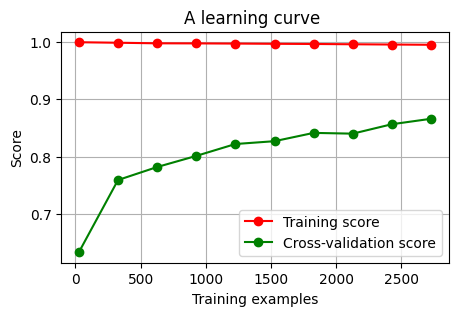

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.set_title('A learning curve ')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score")
ax.grid()

ax.plot(train_sizes,train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes,test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")
chart_png(plt,"Cross Validation - Learning Curve for Decision tree classifier")
plt.show()

#### Performing hyper parameter tuning for the depth and criterion of the Decision tree algorithm using Grid search CV to get the best score and parameters for the training data

In [18]:
# a function to plot a bar graph of important features
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

In [19]:
param_grid = {"max_depth":np.arange(3,24,1),"criterion":["entropy","gini"]}
kff_clf = KFold(n_splits=10,random_state=42, shuffle=True)
clf_grid_cv = DecisionTreeClassifier()
grid_search_cv= GridSearchCV(clf_grid_cv,param_grid,cv=kff_clf)
grid_search_cv.fit(X,y)
print(grid_search_cv.best_params_,grid_search_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 20} 0.8736798679867986


#### Using the best criteria entropy and max_depth as 17

In [20]:
clf_best_param=  DecisionTreeClassifier(criterion='entropy', max_depth = 17, random_state=42)
clf_best_param.fit(X,y)
print(f'Feature importances: {clf_best_param.feature_importances_}')

Feature importances: [0.04168994 0.0040215  0.14825838 0.07381545 0.00326221 0.04330144
 0.12919993 0.08005735 0.03064131 0.04279605 0.03745757 0.04019957
 0.08403043 0.01403409 0.00238113 0.0313917  0.07789931 0.0257267
 0.00460451 0.0030799  0.         0.0095506  0.         0.
 0.07260094]


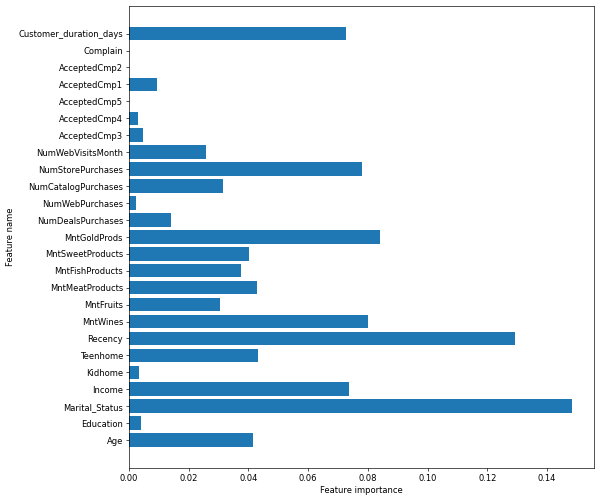

In [21]:
plt.figure(figsize=(10,10), dpi=60)
plot_feature_importances(clf_best_param, X.columns)
chart_png(plt,"Feature_Importance_chart_Decision tree classifier")

In [22]:
y_pred_test =clf_best_param.predict(X_test)
result_metrics_test = classification_report(y_test, y_pred_test, output_dict=True)
print("Result Matrix after using Cross Validation on Test")
classification_report_csv(result_metrics_test,"Decision_Tree_Classifier_Testing_Classification_Report")

Result Matrix after using Cross Validation on Test
              precision    recall  f1-score     support
0              0.920110  0.863049  0.890667  387.000000
1              0.376471  0.524590  0.438356   61.000000
accuracy       0.816964  0.816964  0.816964    0.816964
macro avg      0.648290  0.693820  0.664511  448.000000
weighted avg   0.846088  0.816964  0.829080  448.000000


#### Confusion matrix for decision tree classifier

y values in test set
0    387
1     61
Name: Response, dtype: int64


Confusion Matrix for Decision Tree Classifier


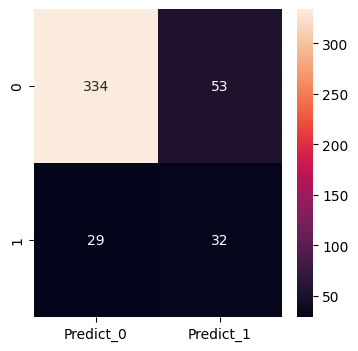

In [23]:
print('y values in test set')
print(y_test.value_counts())
print("\n")
print("Confusion Matrix for Decision Tree Classifier")

cm_clf=metrics.confusion_matrix(y_test, y_pred_test,labels=[0,1])

df_cm_clf = pd.DataFrame(cm_clf, index=[0, 1], columns=["Predict_0", "Predict_1"])
plt.figure(figsize = (4,4))
sns.heatmap(df_cm_clf, annot=True ,fmt='g')
chart_png(plt,"Confusion_Matrix_Decision_Tree_Classifier")
plt.show()

#### K Nearest Neighbours

#### Applying K nearest neighbor algorithm on the sampled data obtained by SMOTE and undersampling techniques

In [24]:
KNN = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
KNN.fit(X, y)
predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.7254464285714286

####  Cross validation for the K nearest neighbor algorithm

In [25]:
kvalues =[3,5,7,10]
for k in kvalues:
    kfold = KFold(n_splits=k, random_state=None, shuffle=True) # Define the split - into 2 folds 

    kfold.get_n_splits(X)
    print("===========================================================================")
    print("KFold begins for K value:", k)
    for train_index, valid_index in kfold.split(X,y):
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

        KNN.fit(X_train, y_train)

        y_pred_valid =KNN.predict(X_valid)
        y_pred_train =KNN.predict(X_train)

        result_metrics_train = classification_report(y_train, y_pred_train, output_dict=True)
        result_metrics_valid = classification_report(y_valid, y_pred_valid, output_dict=True)

        print("==> Result Matrix after using KFolds on KFold Training Data with k value", k)
        classification_report_csv(
            result_metrics_train,
            f"KFold - KNN - Training Data with k- {str(k)}",
        )
        print("\n")
        print("==> Result Matrix after using KFolds on KFold validation Data with K  value", k)
        classification_report_csv(
            result_metrics_valid,
            f"KFold - KNN - Validation Data with K - {str(k)}",
        )
        print("\n")


KFold begins for K value: 3
==> Result Matrix after using KFolds on KFold Training Data with k value 3
              precision    recall  f1-score      support
0              0.992118  0.999008  0.995551  1008.000000
1              0.999006  0.992103  0.995542  1013.000000
accuracy       0.995547  0.995547  0.995547     0.995547
macro avg      0.995562  0.995555  0.995547  2021.000000
weighted avg   0.995571  0.995547  0.995547  2021.000000


==> Result Matrix after using KFolds on KFold validation Data with K  value 3
              precision    recall  f1-score     support
0              0.863309  0.708661  0.778378   508.00000
1              0.750842  0.886680  0.813127   503.00000
accuracy       0.797230  0.797230  0.797230     0.79723
macro avg      0.807076  0.797671  0.795753  1011.00000
weighted avg   0.807354  0.797230  0.795667  1011.00000


==> Result Matrix after using KFolds on KFold Training Data with k value 3
              precision    recall  f1-score      support
0    

### Building learning curve to understand how the model performs on trainning and validation data

In [26]:
from sklearn.model_selection import learning_curve
train_sizes = np.linspace(0.01,1.0,10)  # 5 times 5*3 = 15

train_sizes, train_accuracy, test_accuracy = learning_curve(KNN, X, y,
                            train_sizes = train_sizes,
                            scoring = 'accuracy',
                            cv=10, shuffle=True)

In [27]:
print("Training data Sizes")
print("\n")
print(train_sizes)
print("\n")
print("Training Accuracy for each data size with in each fold")
print("\n")
print(train_accuracy)
print("\n")
print("Validation data accuracy for each data size with in each fold")
print("\n")
print(test_accuracy)

Training data Sizes


[  27  327  627  927 1227 1527 1827 2127 2427 2728]


Training Accuracy for each data size with in each fold


[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         0.9969419  0.9969419  1.         1.         0.9969419
  0.9969419  1.         1.         1.        ]
 [1.         0.99681021 0.99681021 0.9984051  0.9984051  0.99681021
  0.9984051  1.         1.         1.        ]
 [1.         0.99676375 0.99460626 0.99892125 0.9978425  0.9978425
  0.99892125 1.         0.99892125 1.        ]
 [1.         0.99755501 0.99592502 0.999185   0.99755501 0.99511002
  0.99837001 0.99674002 0.99837001 1.        ]
 [0.99869024 0.99672561 0.99541585 0.99803536 0.99803536 0.99541585
  0.99672561 0.99541585 0.99803536 0.99934512]
 [0.99835796 0.99726327 0.99616858 0.99835796 0.99835796 0.99562124
  0.99616858 0.99452655 0.99616858 0.99890531]
 [0.99717913 0.99717913 0.99623883 0.99670898 0.99670898 0.99576869
  0.

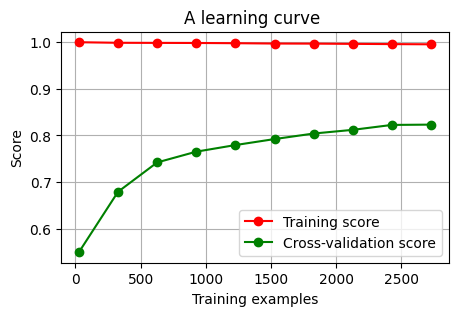

In [28]:
train_scores_mean=np.mean(train_accuracy, axis=1)
test_scores_mean = np.mean(test_accuracy, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.set_title('A learning curve ')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score")
ax.grid()

ax.plot(train_sizes,train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes,test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")
chart_png(plt,"Cross Validation - Learning Curve for KNN")
plt.show()

#### Hyper parameter tuning of k value for k nearest neighbors algorithm


In [29]:
param_grid = {"n_neighbors":np.arange(3,20,2),"weights":['distance']}
kff_KNN = KFold(n_splits=10, random_state=None, shuffle=True)
KNN_grid_cv = KNeighborsClassifier()
grid_search_cv_KNN= GridSearchCV(KNN_grid_cv,param_grid,cv=kff_KNN)
grid_search_cv_KNN.fit(X,y)
print("Best Params")
print(grid_search_cv_KNN.best_params_,grid_search_cv_KNN.best_score_)

Best Params
{'n_neighbors': 3, 'weights': 'distance'} 0.8265144606565921


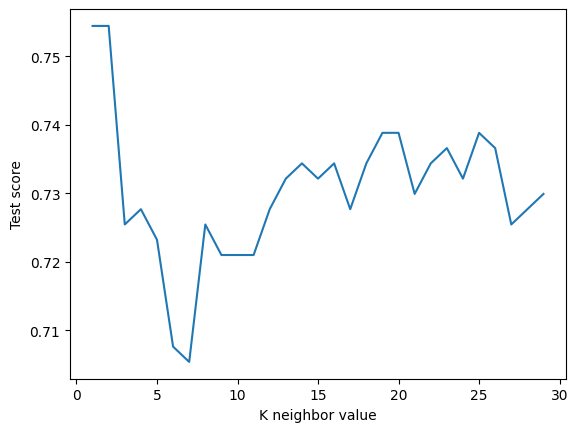

In [30]:
scores =[]
for k in range(1,30):
    KNN = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    KNN.fit(X, y)
    scores.append(KNN.score(X_test, y_test))
plt.plot(range(1,30),scores)
plt.xlabel("K neighbor value")
plt.ylabel("Test score")
chart_png(plt,"KNN - K value Tuning Score")
plt.show()

### Here the test score does not have any significant change for different k values, if we choose 3 or 12 there is just 1 % decrease in the test accuracy score. So we can just take the best parameters generated by GridSearch CV technique

### KNN model with best 3 as k value

In [31]:
KNN_best=KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
KNN_best.fit(X,y)
KNN_best.score(X_test,y_test)
y_pred=KNN_best.predict(X_test)
result_metrics_test = classification_report(y_test, y_pred, output_dict=True)
print("Result Matrix after using KNeighborsClassifier on Test Data")
classification_report_csv(result_metrics_test,"KNN_Testing_Classification_Report")

Result Matrix after using KNeighborsClassifier on Test Data
              precision    recall  f1-score     support
0              0.904908  0.762274  0.827489  387.000000
1              0.245902  0.491803  0.327869   61.000000
accuracy       0.725446  0.725446  0.725446    0.725446
macro avg      0.575405  0.627039  0.577679  448.000000
weighted avg   0.815177  0.725446  0.759461  448.000000


Score:0.7254464285714286


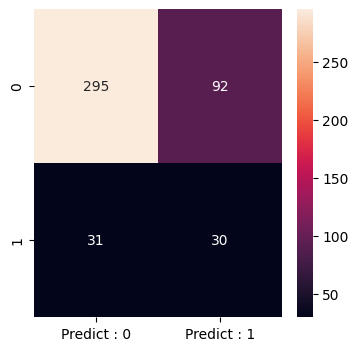

In [32]:
print(f"Score:{KNN_best.score(X_test, y_test)}")
cm=metrics.confusion_matrix(y_test, y_pred,labels=[0,1])
df_cm = pd.DataFrame(cm, index=[0, 1], columns=["Predict : 0", "Predict : 1"])
plt.figure(figsize = (4,4))
sns.heatmap(df_cm, annot=True ,fmt='g')
chart_png(plt,"KNN - Confusion matrix")
plt.show()

#### Random forest classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 90, random_state=1,max_features=19)
rfcl.fit(X,y)

RandomForestClassifier(max_features=19, n_estimators=90, random_state=1)

#### Cross validation for the Random forest classifier

In [34]:
kvalues =[3,5,7,10]
for k in kvalues:
    kfold = KFold(n_splits=k, random_state=None, shuffle=True)
    kfold.get_n_splits(X)
    print("===========================================================================")
    print("KFold for Random Forest value:", k)

    for train_index, valid_index in kfold.split(X,y):
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        rfcl.fit(X_train, y_train)
        y_pred_valid =  rfcl.predict(X_valid)
        y_pred_train =  rfcl.predict(X_train)

        result_metrics_train = classification_report(y_train, y_pred_train, output_dict=True)
        result_metrics_valid = classification_report(y_valid, y_pred_valid, output_dict=True)

        print("==> Result Matrix after using KFolds on RandomForestClassifier Training Data with k value", k)
        classification_report_csv(
            result_metrics_train,
            f"KFold - RF - Training Data with K - {str(k)}",
        )
        print("\n")
        print("==> Result Matrix after using KFolds on RandomForestClassifier Validation Data with k value", k)
        classification_report_csv(
            result_metrics_valid,
            f"KFold - RF - Validation Data with K - {str(k)}",
        )
        print("\n")

KFold for Random Forest value: 3
==> Result Matrix after using KFolds on RandomForestClassifier Training Data with k value 3
              precision    recall  f1-score      support
0              0.997067  0.997067  0.997067  1023.000000
1              0.996994  0.996994  0.996994   998.000000
accuracy       0.997031  0.997031  0.997031     0.997031
macro avg      0.997031  0.997031  0.997031  2021.000000
weighted avg   0.997031  0.997031  0.997031  2021.000000


==> Result Matrix after using KFolds on RandomForestClassifier Validation Data with k value 3
              precision    recall  f1-score      support
0              0.936819  0.872211  0.903361   493.000000
1              0.885870  0.944015  0.914019   518.000000
accuracy       0.909001  0.909001  0.909001     0.909001
macro avg      0.911344  0.908113  0.908690  1011.000000
weighted avg   0.910714  0.909001  0.908822  1011.000000


==> Result Matrix after using KFolds on RandomForestClassifier Training Data with k value 3
 

### Building learning curve to understand how the model performs on trainning and validation data

In [35]:
from sklearn.model_selection import learning_curve
train_sizes = np.linspace(0.01,1.0,10)  # 5 times 5*3 = 15

train_sizes, train_accuracy, test_accuracy = learning_curve(rfcl, X, y,
                            train_sizes = train_sizes,
                            scoring = 'accuracy',
                            cv=10, shuffle=True)

print("Training data Sizes")
print("\n")
print(train_sizes)
print("\n")
print("Training Accuracy for each data size with in each fold")
print("\n")
print(train_accuracy)
print("\n")
print("Validation data accuracy for each data size with in each fold")
print("\n")
print(test_accuracy)

train_scores_mean=np.mean(train_accuracy, axis=1)
test_scores_mean = np.mean(test_accuracy, axis=1)

Training data Sizes


[  27  327  627  927 1227 1527 1827 2127 2427 2728]


Training Accuracy for each data size with in each fold


[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         0.9969419  0.9969419  1.        ]
 [1.         1.         1.         1.         0.9984051  1.
  0.9984051  0.9984051  0.9984051  1.        ]
 [1.         0.9978425  0.9978425  0.9978425  0.99892125 1.
  0.9978425  0.99676375 0.9978425  0.9978425 ]
 [1.         0.99755501 0.99674002 0.99755501 0.99837001 0.999185
  0.99755501 0.99592502 0.99755501 0.99837001]
 [1.         0.99607073 0.99738048 0.99672561 0.99869024 0.99803536
  0.99607073 0.99607073 0.99672561 0.99803536]
 [0.99945265 0.99616858 0.99781062 0.99616858 0.99890531 0.99726327
  0.99562124 0.99562124 0.99726327 0.99726327]
 [0.99905971 0.99576869 0.99764927 0.99576869 0.99764927 0.99717913
  0.99576869 0.99529854 0.99

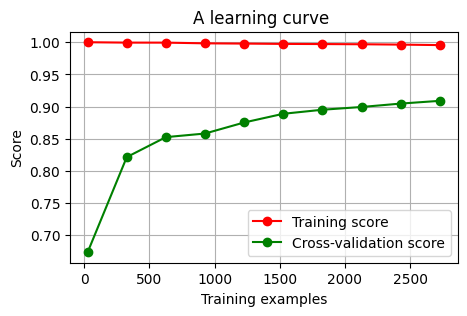

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.set_title('A learning curve ')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score")
ax.grid()

ax.plot(train_sizes,train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes,test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")
chart_png(plt,"Cross Validation - Learning Curve for Random Forest")
plt.show()

#### Using Grid Search CV to find out best parameters

In [37]:
param_grid =param_grid = {
    'n_estimators': [30,50,90],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : np.arange(3,24,1),
    'criterion' :['gini', 'entropy']
}
kff_rfcl = KFold(n_splits=10, random_state=None, shuffle=True)
rfcl_grid_cv = RandomForestClassifier(random_state=42)
grid_search_cv_rfcl= GridSearchCV(rfcl_grid_cv,param_grid,cv=kff_rfcl)
grid_search_cv_rfcl.fit(X,y)
print("Best Params")
print(grid_search_cv_rfcl.best_params_,grid_search_cv_rfcl.best_score_)

Best Params
{'criterion': 'gini', 'max_depth': 17, 'max_features': 'log2', 'n_estimators': 50} 0.9310730415146778


#### Using the best parameters obtained above for modelling

In [38]:
rfcl_best = RandomForestClassifier(n_estimators = 90, random_state=42,max_features='log2',criterion='gini',max_depth=16)
rfcl_best.fit(X,y)

RandomForestClassifier(max_depth=16, max_features='log2', n_estimators=90,
                       random_state=42)

In [39]:
feature_scores = pd.Series(rfcl_best.feature_importances_, index=X.columns).sort_values(ascending=False)
display(feature_scores)

Marital_Status            0.118387
Recency                   0.112321
MntMeatProducts           0.077766
MntGoldProds              0.076815
Income                    0.073409
MntWines                  0.070766
Customer_duration_days    0.062928
NumStorePurchases         0.061939
MntFruits                 0.040430
MntFishProducts           0.039627
Teenhome                  0.038508
Age                       0.036838
MntSweetProducts          0.035996
NumCatalogPurchases       0.030352
NumWebVisitsMonth         0.028556
NumDealsPurchases         0.027646
NumWebPurchases           0.027262
Education                 0.011565
AcceptedCmp5              0.007436
Kidhome                   0.006867
AcceptedCmp1              0.006020
AcceptedCmp3              0.005263
AcceptedCmp4              0.002446
AcceptedCmp2              0.000650
Complain                  0.000208
dtype: float64

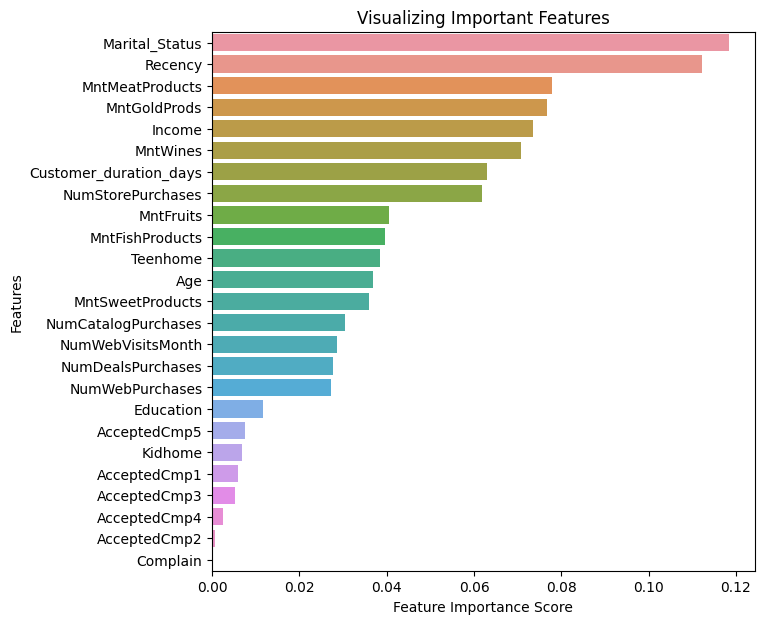

In [40]:
# Creating a seaborn bar plot
fig, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x=feature_scores, y=feature_scores.index,ax=ax)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
chart_png(plt,"Feature_Importance_chart_Random Forest classifier")
plt.show()

In [41]:
y_pred_Random_forest =rfcl_best.predict(X_test)
result_metrics_test = classification_report(y_test, y_pred_Random_forest, output_dict=True)
print("Result Matrix after using Random Forest classifier on Test Data")
classification_report_csv(result_metrics_test,"Random_Forest_Testing_Classification_report")

Result Matrix after using Random Forest classifier on Test Data
              precision    recall  f1-score     support
0              0.930946  0.940568  0.935733  387.000000
1              0.596491  0.557377  0.576271   61.000000
accuracy       0.888393  0.888393  0.888393    0.888393
macro avg      0.763719  0.748973  0.756002  448.000000
weighted avg   0.885407  0.888393  0.886788  448.000000


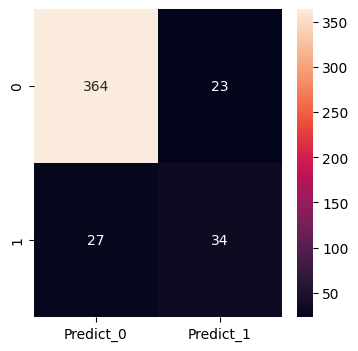

In [42]:
cm_rfcl=metrics.confusion_matrix(y_test, y_pred_Random_forest,labels=[0,1])
df_cm_rfcl = pd.DataFrame(cm_rfcl, index=[0, 1], columns=["Predict_0", "Predict_1"])
plt.figure(figsize = (4,4))
sns.heatmap(df_cm_rfcl, annot=True ,fmt='g')
chart_png(plt,"Random Forest Classifier - Confusion matrix")
plt.show()